
Лабораторная работа 3.3
Вариант 2:

i:        0        1        2       3       4       5
Xi:     -1.0      0.0      1.0     2.0     3.0     4.0
Yi:    0.86603    1.0    0.86603   0.5     0.0    -0.5

Степень = 1
F1(x) = 0.89232x^0 + -0.29132x^1 
Степень = 2
F2(x) = 0.94749x^0 + -0.04307x^1 + -0.08275x^2 


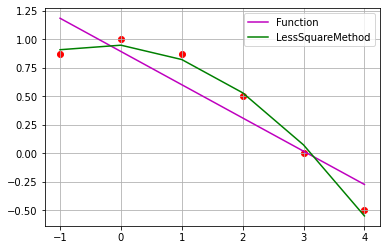

Погрешность функции F1 = 0.27082
Погрешность функции F2 = 0.01518


In [3]:
import matplotlib.pyplot as plt
import scipy.linalg as la

target = '''
i:        0        1        2       3       4       5
Xi:     -1.0      0.0      1.0     2.0     3.0     4.0
Yi:    0.86603    1.0    0.86603   0.5     0.0    -0.5
'''

def func(x, values):
    return sum([c * (x ** i) for i, c in enumerate(values)])

def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

def mls(n, x, y):
    matrix = [[] for _ in range(n + 1)]
    size = len(matrix)
    for i in range(n + 1):
        for j in range(n + 1):
            matrix[i].append(sum([x_j ** (i + j) for x_j in x]))
    b = [0 for _ in range(n + 1)]
    for i in range(n + 1):
        b[i] = sum([y_j * (x_j ** i) for x_j, y_j in zip(x, y)])
    (P, L, U) = la.lu(matrix)
    new_b = la.solve(matrix,b)
    return [round(i, 5) for i in new_b]

def f_printer(coefs):
    n = len(coefs)
    f = f'F{n - 1}(x) = '
    for i in range(n):
        f += f'{coefs[i]}x^{i} + '
    f = f[:-2]
    return f

if __name__ == '__main__':
    print('\nЛабораторная работа 3.3\nВариант 2:')
    print(target)
    x = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
    y = [0.86603, 1.0, 0.86603, 0.5, 0.0, -0.5]
    F = []
    err = []
    coefs = []

    for degree in [1, 2]:
        print(f'Степень = {degree}')
        coefs.append(mls(degree, x, y))
        print(f_printer(coefs[degree - 1]))
        F.append([func(i, coefs[degree - 1]) for i in x])
        err.append(sse(F[degree - 1], y))

    plt.scatter(x, y, color='r')
    plt.plot(x, F[0], color='m', label='Function')
    plt.plot(x, F[1], color='g', label='LessSquareMethod')
    plt.legend(loc='best')
    plt.grid()
    plt.savefig('3_3.png')
    plt.show()

    k = 1
    for i in err:
        print(f'Погрешность функции F{k} = {i}')
        k += 1